<a href="https://colab.research.google.com/github/FernandoRomanos/Python/blob/main/regresion_lineal_Nasdaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Paso 1: importar bibliotecas

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
# Paso 2: Descargar datos del Nasdaq de los últimos 10 años

nasdaq = yf.download('^IXIC', start='2013-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Paso 3: Preparar los datos para la regresión lineal

nasdaq['Date'] = pd.to_datetime(nasdaq.index)
nasdaq['Date'] = nasdaq['Date'].map(pd.Timestamp.toordinal) # Convertir fechas a números
nasdaq['Date'] = nasdaq['Date'].values.reshape(-1, 1)
X = nasdaq[['Date']]
y = nasdaq['Close'].values

In [4]:
# Crear y ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
# Paso 4: Predicciones del modelo

nasdaq['Predicted'] = model.predict(X)

In [6]:
# Paso 5: Calcular R²

r2 = model.score(X, y)
print(f"R²:", {r2})

R²: {0.8687386550197331}


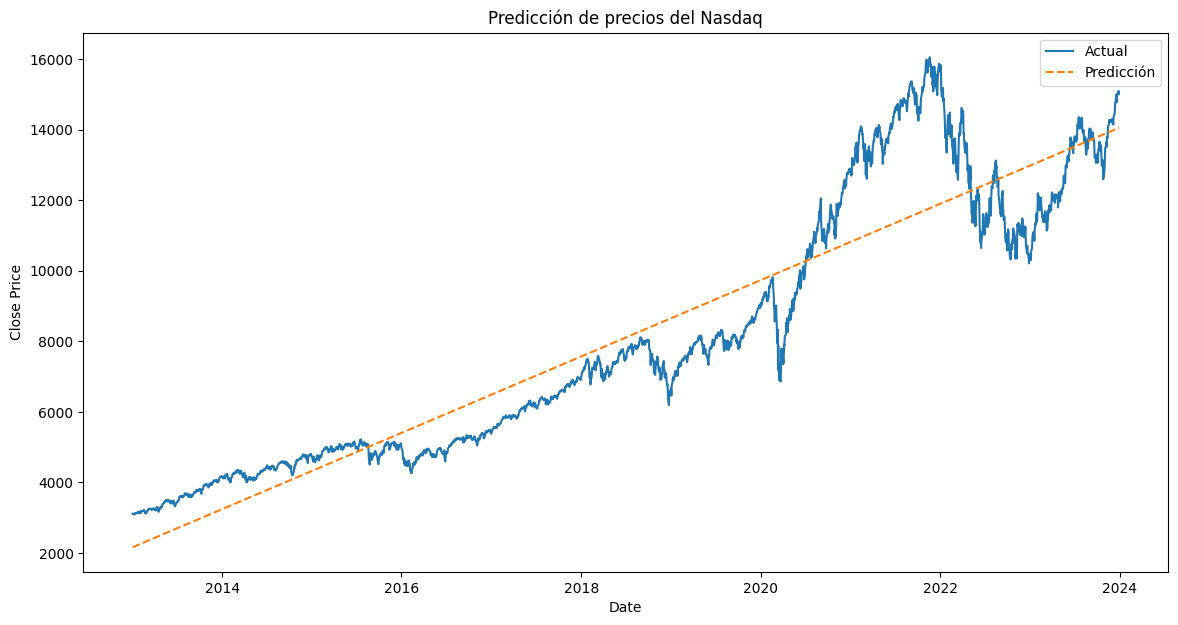

In [7]:
# Paso 6: Graficar los resultados

plt.figure(figsize=(14, 7))
plt.plot(nasdaq.index, nasdaq['Close'], label='Actual')
plt.plot(nasdaq.index, nasdaq['Predicted'], label='Predicción', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicción de precios del Nasdaq')
plt.legend()
plt.show()
